# TensorFlow & Keras - Basics of Deep Learning

### Most importantly... resources

https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

## TF overview

* #### "End-to-end machine learning platform" 

    - Not the only one! Check out PyTorch, Theano, Cognitive Toolkit.
   
* #### Integrates with high-level APIs like Keras
* #### Plays nice with Pandas
* #### Makes deep learning *fast* and *easy* *
    *<sup>"easy"</sup>

## Tasks for TensorFlow:

* #### Regression
    - Predict house prices
    - Predict drug metabolic rates
    - Predict stock trends *
    
    *<sup>this is super hard</sup>
    
    

* #### Classification
    - Cat or dog?
    - Malignant or benign cancer from images
    ![](media/dr.png)
    <span style="font-size:0.75em;">Google AI Blog: Diabetic Retinopathy</span>



* #### Dimensionality reduction
    - Visualize high-dimensional data in 2 or 3-D space
    - Compress representations for successive ML



* #### Generative models
    - Create new molecules with desirable properties
    - Artificially enhance image resolution
    ![](media/molecular_gan.png)
    <span style="font-size:0.75em;">Kadurin et al., 2017</span>


* #### Reinforcement learning
    - Can't beat your friends at chess? Make your computer do it



* #### Much more...
    - Generic math
    - Probabilistic programming with TFP
    - Automatic differentiation
    - ...


## Let's Regress

### Imports!

In [1]:
import numpy as np
import pandas as pd

Name a more iconic duo, I'll wait

#### New imports -- TF and Keras

In [2]:
import keras
import tensorflow as tf

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Check our versions for good measure -- these programs may have very different behavior version-to-version

In [3]:
print(keras.__version__)
print(tf.__version__)

2.2.4
1.12.0


#### Loading in housing data as with SKLearn

In [4]:
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
column_selection = ["bedrooms","bathrooms","sqft_living","sqft_lot",
                    "floors","condition","grade","sqft_above",
                    "sqft_basement","sqft_living15","sqft_lot15",
                    "lat", "long","yr_built","yr_renovated","waterfront"]

selected_feature = np.array(data[column_selection])
price = np.array(data["price"]) #target value
selected_feature_train = selected_feature[:20000]
price_train = price[:20000]

selected_feature_test = selected_feature[20000:]
price_test = price[20000:]

In [6]:
def score(y,y_pred):
    return np.mean(np.abs(y-y_pred)/y)

In [8]:
model= keras.Sequential()

In [9]:
#initialing 3 dense layers, with 50 nodes fully multiplying in 2 layers, with activataion relu, 
#last node is output so linear
input_len= len(column_selection)
model.add(keras.layers.Dense(50, input_dim=input_len, activation= 'relu'))
model.add(keras.layers.Dense(50,activation= 'relu'))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error',optimizer= 'adam')

In [10]:
#epochs is the # of times looking thru the data (hope it compiles in that time)
history = model.fit(selected_feature_train, price_train, epochs=50, batch_size=128)

Epoch 1/50
20000/20000 [==============================] - 1s 51us/step - loss: 352903175340.0320
Epoch 2/50
20000/20000 [==============================] - 0s 9us/step - loss: 237830811418.6240
Epoch 3/50
20000/20000 [==============================] - 0s 9us/step - loss: 98759910110.0032
Epoch 4/50
20000/20000 [==============================] - 0s 9us/step - loss: 76983980005.7856
Epoch 5/50
20000/20000 [==============================] - 0s 9us/step - loss: 74398965360.2304
Epoch 6/50
20000/20000 [==============================] - 0s 9us/step - loss: 72452511524.4544
Epoch 7/50
20000/20000 [==============================] - 0s 9us/step - loss: 70706044036.7104
Epoch 8/50
20000/20000 [==============================] - 0s 9us/step - loss: 69051148638.6176
Epoch 9/50
20000/20000 [==============================] - 0s 9us/step - loss: 67889043282.3296
Epoch 10/50
20000/20000 [==============================] - 0s 9us/step - loss: 66542067292.5696
Epoch 11/50
20000/20000 [=====================

In [11]:
preds= model.predict(selected_feature_test)
score(preds,price_test)

0.5390456021535236

### Like SKLearn, it's easy to train and evaluate simple models.
#### ... but we should try to do better

## Practical Deep Learning -- What you need to know
### Train, Validation, Test:
   * Optimize parameters with Train (weights, biases)
   * Optimize hyperparameters with Validation (layer width & depth, activation functions, etc.)
   * Optimize NOTHING with Test

In [43]:
# Split out a validation set for hyperparameter optimization

selected_feature_train = selected_feature[:18000]
price_train = price[:18000]

selected_feature_val= selected_feature[18000:20000]
price_val= price[18000:20000]

selected_feature_test= selected_feature[20000:]
price_test= price[20000:]

#### In the future, try better validation schemes like [k-fold cross validation](https://chrisalbon.com/deep_learning/keras/k-fold_cross-validating_neural_networks/), though 80/20 or 90/10 train/val like this works in a pinch

### Try a hyperparameter optimization:

### Try three activation functions to use for dense layers in the neural network above. Save the model that achieves the best validation loss 

#### Hint: [activation functions](http://letmegooglethat.com/?q=keras+activation+functions)

#### Hint: `model.fit` has argument "`validation_data`" which takes a tuple of features and targets

#### Hint: Use `model.save("filename.h5")` to save a model locally. If you want to use it later, just call `keras.models.load_model("filename.h5")`

In [42]:
#activation selu
input_len= len(column_selection)
model.add(keras.layers.Dense(50, input_dim=input_len, activation= 'selu'))
model.add(keras.layers.Dense(50,activation= 'selu'))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error',optimizer= 'adam')
history = model.fit(selected_feature_train, price_train, epochs=50, batch_size=128)

val= model.predict(selected_feature_val)
score(val,price_val)

Epoch 1/50
18000/18000 [==============================] - 1s 59us/step - loss: 60230493882.1404
Epoch 2/50
18000/18000 [==============================] - 0s 16us/step - loss: 49359783537.3227
Epoch 3/50
18000/18000 [==============================] - 0s 16us/step - loss: 49357892568.8604
Epoch 4/50
18000/18000 [==============================] - 0s 16us/step - loss: 49064923103.2320
Epoch 5/50
18000/18000 [==============================] - 0s 18us/step - loss: 49340822150.2578
Epoch 6/50
18000/18000 [==============================] - 0s 17us/step - loss: 49431256951.4667
Epoch 7/50
18000/18000 [==============================] - 0s 16us/step - loss: 48976940262.2862
Epoch 8/50
18000/18000 [==============================] - 0s 16us/step - loss: 49368135183.0187
Epoch 9/50
18000/18000 [==============================] - 0s 16us/step - loss: 49086852690.3751
Epoch 10/50
18000/18000 [==============================] - 0s 16us/step - loss: 49177578030.8764
Epoch 11/50
18000/18000 [==============

0.5558169860781627

In [16]:
#activation elu
input_len= len(column_selection)
model.add(keras.layers.Dense(50, input_dim=input_len, activation= 'elu'))
model.add(keras.layers.Dense(50,activation= 'elu'))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error',optimizer= 'adam')
history = model.fit(selected_feature_train, price_train, epochs=50, batch_size=128)

val= model.predict(selected_feature_val)
score(val,price_val)

Epoch 1/50
18000/18000 [==============================] - 1s 43us/step - loss: 81649450257.9769
Epoch 2/50
18000/18000 [==============================] - 0s 15us/step - loss: 54741760817.3796
Epoch 3/50
18000/18000 [==============================] - 0s 16us/step - loss: 54130617090.0480
Epoch 4/50
18000/18000 [==============================] - 0s 16us/step - loss: 54258689835.0080
Epoch 5/50
18000/18000 [==============================] - 0s 17us/step - loss: 53719558207.7156
Epoch 6/50
18000/18000 [==============================] - 0s 16us/step - loss: 54086122784.5404
Epoch 7/50
18000/18000 [==============================] - 0s 16us/step - loss: 54211359497.3298
Epoch 8/50
18000/18000 [==============================] - 0s 16us/step - loss: 54277979486.4356
Epoch 9/50
18000/18000 [==============================] - 0s 16us/step - loss: 53610041966.5920
Epoch 10/50
18000/18000 [==============================] - 0s 16us/step - loss: 53531314844.1031
Epoch 11/50
18000/18000 [==============

0.6034312424804318

In [17]:
#activation linear
input_len= len(column_selection)
model.add(keras.layers.Dense(50, input_dim=input_len, activation= 'linear'))
model.add(keras.layers.Dense(50,activation= 'linear'))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error',optimizer= 'adam')
history = model.fit(selected_feature_train, price_train, epochs=50, batch_size=128)

val= model.predict(selected_feature_val)
score(val,price_val)

Epoch 1/50
18000/18000 [==============================] - 1s 54us/step - loss: 61807270141.0418
Epoch 2/50
18000/18000 [==============================] - 0s 17us/step - loss: 50944814022.6560
Epoch 3/50
18000/18000 [==============================] - 0s 17us/step - loss: 51255603553.1662
Epoch 4/50
18000/18000 [==============================] - 0s 17us/step - loss: 50916969691.3636
Epoch 5/50
18000/18000 [==============================] - 0s 17us/step - loss: 50907051411.2284
Epoch 6/50
18000/18000 [==============================] - 0s 18us/step - loss: 50385028877.8809
Epoch 7/50
18000/18000 [==============================] - 0s 17us/step - loss: 50547888415.6302
Epoch 8/50
18000/18000 [==============================] - 0s 17us/step - loss: 52158042887.5093
Epoch 9/50
18000/18000 [==============================] - 0s 17us/step - loss: 50615859449.4009
Epoch 10/50
18000/18000 [==============================] - 0s 16us/step - loss: 50319394672.1849
Epoch 11/50
18000/18000 [==============

0.5740627211372606

In [55]:
#for easy looping, define neural network model as a function
def nn_model(optimizer='adam',
            activation='relu',
            layers = [20,20],
            nodes=50,
            loss='mean_squared_error'):
    model=keras.Sequential()
    model.add(keras.layers.Dense(nodes, activation=activation))
    model.add(keras.layers.Dense(nodes,activation=activation))
    model.add(keras.layers.Dense(1))
    
    model.compile(loss=loss,optimizer=optimizer)
    return model

In [45]:
best_score= 1000.0 #bad

#loop over activation functions, test on valid, take model with best results
for activ in ['sigmoid','tanh','relu']:
    model = nn_model(activation=activ)

    history = model.fit(selected_feature_train, price_train,
                epochs=50, batch_size=128,
                validation_data=(selected_feature_val, price_val))
    model_score = score(model.predict(selected_feature_val), price_val)

    if model_score < best_score:
        best_score = model_score
        best_activ = activ
        best_model = model
        best_train = history

print(f"BEST ACTIVATION FUNCTION {best_activ} WITH SCORE {best_score}")
best_model.save("awesome_model.h5")

    

Train on 18000 samples, validate on 2000 samples
Epoch 1/50
18000/18000 [==============================] - 1s 56us/step - loss: 416670513685.3902 - val_loss: 456355991781.3760
Epoch 2/50
18000/18000 [==============================] - 0s 13us/step - loss: 416663985251.2142 - val_loss: 456349727064.0641
Epoch 3/50
18000/18000 [==============================] - 0s 13us/step - loss: 416657991212.1458 - val_loss: 456343496687.6160
Epoch 4/50
18000/18000 [==============================] - 0s 13us/step - loss: 416652148342.7840 - val_loss: 456337605001.2160
Epoch 5/50
18000/18000 [==============================] - 0s 14us/step - loss: 416646625813.3902 - val_loss: 456331810832.3840
Epoch 6/50
18000/18000 [==============================] - 0s 14us/step - loss: 416640896190.2365 - val_loss: 456325733023.7440
Epoch 7/50
18000/18000 [==============================] - 0s 14us/step - loss: 416635257152.3983 - val_loss: 456319932563.4559
Epoch 8/50
18000/18000 [==============================] - 0s 1

18000/18000 [==============================] - 0s 13us/step - loss: 416559418601.9271 - val_loss: 456239406907.3920
Epoch 15/50
18000/18000 [==============================] - 0s 13us/step - loss: 416551750161.7493 - val_loss: 456231403388.9279
Epoch 16/50
18000/18000 [==============================] - 0s 13us/step - loss: 416544086877.0703 - val_loss: 456223366840.3200
Epoch 17/50
18000/18000 [==============================] - 0s 14us/step - loss: 416536425048.7467 - val_loss: 456215349428.2240
Epoch 18/50
18000/18000 [==============================] - 0s 13us/step - loss: 416528768375.9218 - val_loss: 456207346958.3361
Epoch 19/50
18000/18000 [==============================] - 0s 12us/step - loss: 416521107188.3947 - val_loss: 456199319584.7679
Epoch 20/50
18000/18000 [==============================] - 0s 14us/step - loss: 416513450282.5529 - val_loss: 456191304007.6800
Epoch 21/50
18000/18000 [==============================] - 0s 13us/step - loss: 416505796435.0578 - val_loss: 456183

18000/18000 [==============================] - 0s 13us/step - loss: 62844599883.0933 - val_loss: 72602594836.4800
Epoch 29/50
18000/18000 [==============================] - 0s 13us/step - loss: 62888452085.0773 - val_loss: 71825045979.1360
Epoch 30/50
18000/18000 [==============================] - 0s 13us/step - loss: 63052298270.9476 - val_loss: 71988548403.2000
Epoch 31/50
18000/18000 [==============================] - 0s 13us/step - loss: 62788228335.3884 - val_loss: 71855879880.7040
Epoch 32/50
18000/18000 [==============================] - 0s 12us/step - loss: 62786772118.1867 - val_loss: 72220120252.4160
Epoch 33/50
18000/18000 [==============================] - 0s 13us/step - loss: 62604678536.3058 - val_loss: 71993456459.7760
Epoch 34/50
18000/18000 [==============================] - 0s 13us/step - loss: 62530301296.6400 - val_loss: 72691544752.1280
Epoch 35/50
18000/18000 [==============================] - 0s 13us/step - loss: 62676467606.4142 - val_loss: 71867607547.9040
Epoc

### Visualize your training:

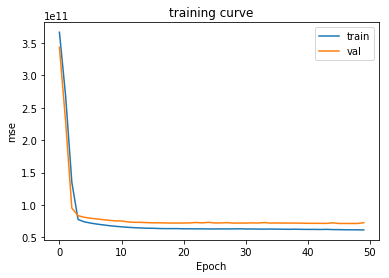

In [50]:
import matplotlib.pyplot as plt
def plot_loss(hist):
    %matplotlib inline
    plt.title("training curve")
    plt.plot(hist.history['loss'], label= 'train')
    plt.plot(hist.history['val_loss'], label= 'val')
    plt.xlabel('Epoch')
    plt.ylabel('mse')
    plt.legend()
    plt.show()
    
plot_loss(best_train)



### Standardize your features:
* Typically assumes normally distributed feature, shifting mean to 0 and standard deviation to 1
* In theory does not matter for neural networks
* In practice tends to matter for neural networks
* Scale if using:
    - Logistic regression
    - Support vector machines
    - Perceptrons
    - Neural networks
    - Principle component analysis
* Don't bother if using:
    - "Forest" methods
    - Naive Bayes

In [51]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
in_scaler = StandardScaler()

# Fit scaler to the training set and perform the transformation
selected_feature_train = in_scaler.fit_transform(selected_feature_train)

# Use the fitted scaler to transform validation and test features
selected_feature_val = in_scaler.transform(selected_feature_val)
selected_feature_test = in_scaler.transform(selected_feature_test)

# Check appropriate scaling
print(np.mean(selected_feature_train[:,0]))
print(np.std(selected_feature_train[:,0]))

print(np.mean(selected_feature_val[:,0]))
print(np.std(selected_feature_val[:,0]))

print(np.mean(selected_feature_test[:,0]))
print(np.std(selected_feature_test[:,0]))

-9.158106372019069e-17
1.0
0.016119707489855875
0.9970087526331801
0.09330835574898895
0.9414925643047213


Train on 18000 samples, validate on 2000 samples
Epoch 1/200
18000/18000 [==============================] - 1s 63us/step - loss: 416644576342.4711 - val_loss: 456238560968.7040
Epoch 2/200
18000/18000 [==============================] - 0s 14us/step - loss: 416217345847.7511 - val_loss: 455239404617.7280
Epoch 3/200
18000/18000 [==============================] - 0s 13us/step - loss: 414568203652.6649 - val_loss: 452390604242.9440
Epoch 4/200
18000/18000 [==============================] - 0s 15us/step - loss: 410827554699.4915 - val_loss: 446754436153.3439
Epoch 5/200
18000/18000 [==============================] - 0s 14us/step - loss: 404285346603.9182 - val_loss: 437735351123.9680
Epoch 6/200
18000/18000 [==============================] - 0s 14us/step - loss: 394443159881.5004 - val_loss: 424681049686.0160
Epoch 7/200
18000/18000 [==============================] - 0s 14us/step - loss: 380969343341.9094 - val_loss: 407551324192.7680
Epoch 8/200
18000/18000 [==============================

Epoch 65/200
18000/18000 [==============================] - 0s 14us/step - loss: 44668920798.3218 - val_loss: 48556024594.4320
Epoch 66/200
18000/18000 [==============================] - 0s 13us/step - loss: 44065825944.0071 - val_loss: 48018722324.4800
Epoch 67/200
18000/18000 [==============================] - 0s 12us/step - loss: 43491713708.4871 - val_loss: 47489612972.0320
Epoch 68/200
18000/18000 [==============================] - 0s 13us/step - loss: 42933053449.1022 - val_loss: 46974494277.6320
Epoch 69/200
18000/18000 [==============================] - 0s 13us/step - loss: 42380851664.2133 - val_loss: 46489537085.4400
Epoch 70/200
18000/18000 [==============================] - 0s 13us/step - loss: 41848715061.9307 - val_loss: 46021432279.0400
Epoch 71/200
18000/18000 [==============================] - 0s 13us/step - loss: 41358062150.5422 - val_loss: 45597235871.7440
Epoch 72/200
18000/18000 [==============================] - 0s 13us/step - loss: 40881822851.9822 - val_loss: 4

18000/18000 [==============================] - 0s 12us/step - loss: 33574015460.2382 - val_loss: 38947042656.2560
Epoch 130/200
18000/18000 [==============================] - 0s 14us/step - loss: 33535860282.7093 - val_loss: 38937162612.7360
Epoch 131/200
18000/18000 [==============================] - 0s 12us/step - loss: 33509337834.3822 - val_loss: 38841020252.1600
Epoch 132/200
18000/18000 [==============================] - 0s 14us/step - loss: 33451758348.9707 - val_loss: 38827133960.1920
Epoch 133/200
18000/18000 [==============================] - 0s 13us/step - loss: 33413189125.9164 - val_loss: 38790277922.8160
Epoch 134/200
18000/18000 [==============================] - 0s 13us/step - loss: 33370294787.1858 - val_loss: 38740267368.4480
Epoch 135/200
18000/18000 [==============================] - 0s 13us/step - loss: 33336932197.2622 - val_loss: 38691618455.5520
Epoch 136/200
18000/18000 [==============================] - 0s 13us/step - loss: 33301094136.0356 - val_loss: 3867234

18000/18000 [==============================] - 0s 13us/step - loss: 31949070141.2124 - val_loss: 37163080417.2800
Epoch 194/200
18000/18000 [==============================] - 0s 12us/step - loss: 31931307527.7369 - val_loss: 37145755058.1760
Epoch 195/200
18000/18000 [==============================] - 0s 13us/step - loss: 31915058033.0951 - val_loss: 37132860424.1920
Epoch 196/200
18000/18000 [==============================] - 0s 13us/step - loss: 31906238343.8507 - val_loss: 37122890137.6000
Epoch 197/200
18000/18000 [==============================] - 0s 14us/step - loss: 31893298808.6044 - val_loss: 37079881121.7920
Epoch 198/200
18000/18000 [==============================] - 0s 13us/step - loss: 31859803912.4196 - val_loss: 37084478504.9600
Epoch 199/200
18000/18000 [==============================] - 0s 13us/step - loss: 31836456517.6320 - val_loss: 37047174922.2400
Epoch 200/200
18000/18000 [==============================] - 0s 13us/step - loss: 31823952594.7164 - val_loss: 3702340

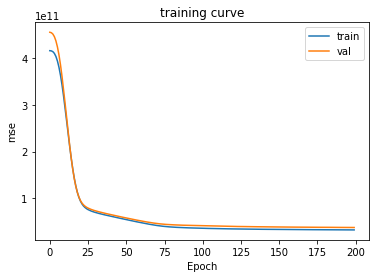

In [52]:
model = nn_model()

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(selected_feature_train, price_train,
            epochs=200, batch_size=128,
            validation_data=(selected_feature_val, price_val))
model_score = score(model.predict(selected_feature_val), price_val)
print(model_score)

plot_loss(history)

#### In the future, consider standardizing outputs as well

### Regularize:
* Heavily parameterized models like neural networks are prone to overfitting
* Popular off-the-shelf tools exist to regularize models and prevent overfitting:
    - L2 regularization (weight decay)
    - Dropout
    - Batch normalization
    
#### These tools come as standard Keras/TF layers!
`model.add(keras.layers.Dropout(rate)`
`model.add(keras.layers.ActivityRegularization(l1=0.0, l2=0.0)`
`model.add(keras.layers.BatchNormalization())`

### Early stopping and model checkpointing:
#### It's unlikely the last iteration is the best, and who knows how long until the thing is converged. Just grab the best validation error.

Train on 18000 samples, validate on 2000 samples
Epoch 1/400
18000/18000 [==============================] - 1s 63us/step - loss: 416651191954.0906 - val_loss: 456254929764.3519

Epoch 00001: val_loss improved from inf to 456254929764.35199, saving model to best_model.h5
Epoch 2/400
18000/18000 [==============================] - 0s 14us/step - loss: 416239840977.8062 - val_loss: 455212861227.0080

Epoch 00002: val_loss improved from 456254929764.35199 to 455212861227.00800, saving model to best_model.h5
Epoch 3/400
18000/18000 [==============================] - 0s 14us/step - loss: 414451035653.9164 - val_loss: 451995516796.9279

Epoch 00003: val_loss improved from 455212861227.00800 to 451995516796.92798, saving model to best_model.h5
Epoch 4/400
18000/18000 [==============================] - 0s 14us/step - loss: 410312852548.2667 - val_loss: 445569458241.5360

Epoch 00004: val_loss improved from 451995516796.92798 to 445569458241.53601, saving model to best_model.h5
Epoch 5/400
18000/


Epoch 00035: val_loss improved from 73488728129.53600 to 72269803290.62399, saving model to best_model.h5
Epoch 36/400
18000/18000 [==============================] - 0s 13us/step - loss: 68136297693.1840 - val_loss: 71153654890.4960

Epoch 00036: val_loss improved from 72269803290.62399 to 71153654890.49600, saving model to best_model.h5
Epoch 37/400
18000/18000 [==============================] - 0s 13us/step - loss: 67135716007.0258 - val_loss: 70148414570.4960

Epoch 00037: val_loss improved from 71153654890.49600 to 70148414570.49600, saving model to best_model.h5
Epoch 38/400
18000/18000 [==============================] - 0s 13us/step - loss: 66225098864.8676 - val_loss: 69202517983.2320

Epoch 00038: val_loss improved from 70148414570.49600 to 69202517983.23199, saving model to best_model.h5
Epoch 39/400
18000/18000 [==============================] - 0s 14us/step - loss: 65341304507.9609 - val_loss: 68319505514.4960

Epoch 00039: val_loss improved from 69202517983.23199 to 683195

Epoch 71/400
18000/18000 [==============================] - 0s 14us/step - loss: 43455413179.7333 - val_loss: 47444390903.8080

Epoch 00071: val_loss improved from 47897013977.08800 to 47444390903.80800, saving model to best_model.h5
Epoch 72/400
18000/18000 [==============================] - 0s 13us/step - loss: 42957391021.8524 - val_loss: 47000602869.7600

Epoch 00072: val_loss improved from 47444390903.80800 to 47000602869.76000, saving model to best_model.h5
Epoch 73/400
18000/18000 [==============================] - 0s 13us/step - loss: 42468395778.0480 - val_loss: 46586556219.3920

Epoch 00073: val_loss improved from 47000602869.76000 to 46586556219.39200, saving model to best_model.h5
Epoch 74/400
18000/18000 [==============================] - 0s 13us/step - loss: 42015351126.2436 - val_loss: 46177700380.6720

Epoch 00074: val_loss improved from 46586556219.39200 to 46177700380.67200, saving model to best_model.h5
Epoch 75/400
18000/18000 [==============================] - 0s 1

18000/18000 [==============================] - 0s 14us/step - loss: 34991461032.8462 - val_loss: 40072965226.4960

Epoch 00106: val_loss improved from 40106534633.47200 to 40072965226.49600, saving model to best_model.h5
Epoch 107/400
18000/18000 [==============================] - 0s 13us/step - loss: 34912890018.9298 - val_loss: 40011368431.6160

Epoch 00107: val_loss improved from 40072965226.49600 to 40011368431.61600, saving model to best_model.h5
Epoch 108/400
18000/18000 [==============================] - 0s 14us/step - loss: 34848528294.7982 - val_loss: 39953021403.1360

Epoch 00108: val_loss improved from 40011368431.61600 to 39953021403.13600, saving model to best_model.h5
Epoch 109/400
18000/18000 [==============================] - 0s 13us/step - loss: 34784925450.2400 - val_loss: 39893999648.7680

Epoch 00109: val_loss improved from 39953021403.13600 to 39893999648.76800, saving model to best_model.h5
Epoch 110/400
18000/18000 [==============================] - 0s 14us/step 

18000/18000 [==============================] - 0s 13us/step - loss: 33526694232.0640 - val_loss: 38717098950.6560

Epoch 00141: val_loss improved from 38762276028.41600 to 38717098950.65600, saving model to best_model.h5
Epoch 142/400
18000/18000 [==============================] - ETA: 0s - loss: 34045597224.778 - 0s 13us/step - loss: 33499196165.6889 - val_loss: 38683190722.5600

Epoch 00142: val_loss improved from 38717098950.65600 to 38683190722.56000, saving model to best_model.h5
Epoch 143/400
18000/18000 [==============================] - 0s 13us/step - loss: 33470489136.6969 - val_loss: 38641187127.2960

Epoch 00143: val_loss improved from 38683190722.56000 to 38641187127.29600, saving model to best_model.h5
Epoch 144/400
18000/18000 [==============================] - 0s 13us/step - loss: 33440586416.1280 - val_loss: 38672206462.9760

Epoch 00144: val_loss did not improve from 38641187127.29600
Epoch 145/400
18000/18000 [==============================] - 0s 13us/step - loss: 334

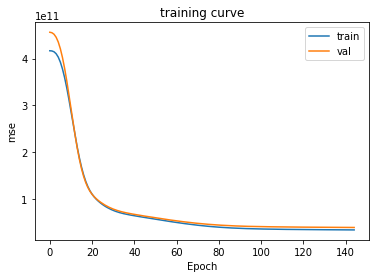

In [56]:
# Set callback functions to early stop training and save the 
# best model so far
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
            ModelCheckpoint(filepath='best_model.h5',
                            monitor='val_loss',
                            save_best_only=True,
                           verbose=1)]

model = nn_model(layers =[20,20,20])

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(selected_feature_train, price_train,
            epochs=400, callbacks=callbacks, batch_size=128,
            validation_data=(selected_feature_val, price_val))

model_score = score(model.predict(selected_feature_val), price_val)
print(f"Model score: {model_score}")
plot_loss(history)


### You don't have to remember these resources because they're here when you need them
https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

### Don't trust me, trust your validation errors
### Don't look at your test set until you're actually going to test